In [3]:
#Selenium imports here
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from bs4 import BeautifulSoup
#Other imports here
import os
import wget
import requests
import pandas as pd
import pickle

In [2]:
Reviewdata = pd.read_csv('reviews.csv')
Reviewdata.head()

,polarity,reviews
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


# Data Cleaning

In [3]:
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])
missing_data

,Count,Percentage
reviews,0,0.0
polarity,0,0.0


# Polarity determining

percentage for default

2    50.0
1    50.0
Name: polarity, dtype: float64


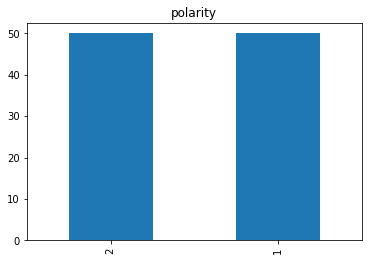

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
print("percentage for default\n")
print(round(Reviewdata.polarity.value_counts(normalize=True)*100,2))
round(Reviewdata.polarity.value_counts(normalize=True)*100,2).plot(kind="bar")
plt.title("polarity")
plt.show()

# Cleaning the reviews

In [5]:
import re
import string
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text
cleaned1 = lambda x : text_clean_1(x)


In [6]:
Reviewdata['cleanedData'] = pd.DataFrame(Reviewdata.reviews.apply(cleaned1))
Reviewdata.head()

,polarity,reviews,cleanedData
0,1,"Unfortunately, the frustration of being Dr. Go...",unfortunately the frustration of being dr gold...
1,2,Been going to Dr. Goldberg for over 10 years. ...,been going to dr goldberg for over years i th...
2,1,I don't know what Dr. Goldberg was like before...,i dont know what dr goldberg was like before ...
3,1,I'm writing this review to give you a heads up...,im writing this review to give you a heads up ...
4,2,All the food is great here. But the best thing...,all the food is great here but the best thing ...


# Model Training

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X = Reviewdata.cleanedData
Y = Reviewdata.polarity

X = Reviewdata.iloc[:160000,-1].values
Y = Reviewdata.iloc[:160000,0].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('X_train: ',len(X_train))
print('y_train: ',len(y_train))
print('X_test: ',len(X_test))
print('Y_test: ',len(y_test))


X_train:  128000
y_train:  128000
X_test:  32000
Y_test:  32000


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec =TfidfVectorizer()
clf2 = LogisticRegression(solver='lbfgs')
from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(X_train,y_train)

In [16]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
confusion_matrix(predictions,y_test)

array([[15600,  1372],
       [ 1140, 13888]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("Accuracy:",accuracy_score(predictions,y_test))
print("Precision:",precision_score(predictions,y_test,average="weighted"))
print("Recall:",recall_score(predictions,y_test,average="weighted"))

Accuracy: 0.9215
Precision: 0.921658107263819
Recall: 0.9215


In [18]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Dumping model into pickle file

In [16]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
confusion_matrix(result,y_test)

array([[15600,  1372],
       [ 1140, 13888]], dtype=int64)

# Testing model

In [20]:
ex = ["This one is good. good for work from home. The actual screen size is 32 cm x 70 cm. This is good for software people. Video play is also bad."]
print(type(ex))
val = model.predict(ex)
print(val)
print("1 - negative\n2 - positive")


<class 'list'>
[2]
1 - negative
2 - positive


In [14]:
ex = rev
len(ex)

NameError: name 'rev' is not defined

In [84]:
ans = []
for i in rev1:
    i = i.replace("\n","")
    ans.append([i])
print(len(ans))
print(type(ans))
for i in ans:
    val = model.predict(i)
    print(val-1)

15
<class 'list'>
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[0]
[1]


# WEB SCRAPPING

In [1]:
header = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36 OPR/83.0.4254.70'
    }

In [2]:
driver = webdriver.Edge('C:/Users/Hansel/edgedriver_win64/msedgedriver.exe')

NameError: name 'webdriver' is not defined

In [29]:
def get_url(search_term):
    template = 'https://www.amazon.in/s?k={}&crid=2U21CDDK65IB9&ref=nb_sb_noss_2'
    search_term = search_term.replace(' ','+')
    return template.format(search_term)

In [42]:
term = input("enter what you want:")
no = input("Enter the number of products:")
no = int(no)
url = get_url(term)
url2 = url
print(url)
print(type(no))
driver.get(url)

enter what you want:chocolate
Enter the number of products:2
https://www.amazon.in/s?k=chocolate&crid=2U21CDDK65IB9&ref=nb_sb_noss_2
<class 'int'>


In [43]:
records = []
records_name=[]
soup = BeautifulSoup(driver.page_source,'html.parser')
for i in soup.find_all('div',{'data-component-type':'s-search-result'})[:no]:
    records.append(i['data-asin'])
    records_name.append(i.h2.a.text.strip())
results = []
print(records_name)
for i in records:
    results.append(f"https://www.amazon.in/dp/product-reviews/{i}")
for i in results:
    driver.get(i)
print(results)

['Cadbury Rich Cocoa Dark Chocolate Bar, 80 g', "Kisses Hershey's Cookies n Creme, Almonds & Milk Chocolate, 100.8g (Pack of 3)"]
['https://www.amazon.in/dp/product-reviews/B017LHTFFK', 'https://www.amazon.in/dp/product-reviews/B0834SLRHM']


In [32]:
# item = results[0]
# element = item.h2.a
# unit = element.get('href')
# unit_url = 'https://www.amazon.in'+unit

In [33]:
# def extracting_units(results):
#     links = []
#     for i in results:
#         element = i.h2.a
#         unit = element.get('href')
#         unit_url = 'https://www.amazon.in'+unit
#         links.append(unit_url)
        
#     return links

In [38]:
lst = []
print(records)
def unit(records):
    for i in records:
        lst.append(f"https://www.amazon.in/dp/product-reviews/{i}")
        
unit(records)
lst

['B017LHTFFK', 'B0834SLRHM']


['https://www.amazon.in/dp/product-reviews/B017LHTFFK',
 'https://www.amazon.in/dp/product-reviews/B0834SLRHM']

In [40]:
rev = []
def reviews_unit(results):
    for j in range(len(results)):
        page=requests.get(results[j],headers=header)
        soup=BeautifulSoup(page.content,'html.parser')
        for i in soup.findAll("span",{'data-hook':"review-body"})[:10]:
            rev.append(i.text)
        title = soup.find(id='productTitle').get_text()
        print(title)
reviews_unit(results)

AttributeError: 'NoneType' object has no attribute 'get_text'

In [25]:
rev

['\n\n  The clarity of camera is amazing.Even in low light conditions the picture is clearly visible.An attempt has been made to show a color picture in dark, which  I think is very unique.The installation is very easy . the app is fairly straight forward.MADE IN INDIA product .Overall the device is must have one!!!\n\n',
 '\n\n  The best camera with the following features- AI support for person detection- best image clarity on low light and night- easy to setup- Alexa and google assistant support- High built quality- Make in India product- Cloud storage and SD card storage support- Nice packaging- Less power consumption- Comparable with nest, arlo, ring and wyze cameras- Faster software updates with features However, Qubo is a fantastic one!It could make the camera superior if increase efficiency on AI person detection, desktop live grid view apps, local storage support(NAS/NVR), fixed mount option or 1/4” thread 0.5 mm screw thread, optional power adapter to connect directly to elect

In [36]:
rev1=[]
import re
import string
for i in rev:
    text = i.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text = text.strip('\n')
    text = text.strip('\t')
    rev1.append(text)

In [37]:
len(rev1)

100

In [38]:
rev1

['  the clarity of camera is amazingeven in low light conditions the picture is clearly visiblean attempt has been made to show a color picture in dark which  i think is very uniquethe installation is very easy  the app is fairly straight forwardmade in india product overall the device is must have one',
 '  the best camera with the following features ai support for person detection best image clarity on low light and night easy to setup alexa and google assistant support high built quality make in india product cloud storage and sd card storage support nice packaging less power consumption comparable with nest arlo ring and wyze cameras faster software updates with features however qubo is a fantastic oneit could make the camera superior if increase efficiency on ai person detection desktop live grid view apps local storage supportnasnvr fixed mount option or ” thread  mm screw thread optional power adapter to connect directly to electricity supply as in qubo video doorbell administra

In [52]:
from textblob import TextBlob

In [53]:
len(rev)

15

In [54]:
polar = []
for i in rev:
    fed = TextBlob(i)
    polar.append(str(fed.sentiment))
polar

['Sentiment(polarity=0.1875, subjectivity=0.2875)',
 'Sentiment(polarity=0.3666666666666667, subjectivity=0.41111111111111115)',
 'Sentiment(polarity=0.6, subjectivity=0.8)',
 'Sentiment(polarity=0.457, subjectivity=0.556)',
 'Sentiment(polarity=0.21309523809523803, subjectivity=0.6297619047619047)',
 'Sentiment(polarity=0.0, subjectivity=0.0)',
 'Sentiment(polarity=-0.29999999999999993, subjectivity=0.4666666666666667)',
 'Sentiment(polarity=0.12777777777777777, subjectivity=0.4740740740740741)',
 'Sentiment(polarity=0.2325974025974026, subjectivity=0.555064935064935)',
 'Sentiment(polarity=0.08666666666666668, subjectivity=0.4966666666666666)',
 'Sentiment(polarity=0.359375, subjectivity=0.7208333333333333)',
 'Sentiment(polarity=0.22916666666666669, subjectivity=0.5642857142857143)',
 'Sentiment(polarity=0.0, subjectivity=0.0)',
 'Sentiment(polarity=-0.08333333333333333, subjectivity=0.36296296296296293)',
 'Sentiment(polarity=0.7, subjectivity=0.6000000000000001)']

In [62]:
rev1

['\n\n\n\n\n                    the media could not be loaded\n                \n\n\n\n\n  \xa0i like snickers but big bar is nicergot this one due to savings dealcount the pieces as u can get  or  lessmine was fineall  pieces were theresnickers is just best  all other are copycats\n\n',
 '\n\n  good quality product received chocolates taste fresh and well handled  tasted good and overall were very happy  this narrower bar has a fewer big nut pieces but that is natural with this format vs a wider standard baronly suggestion is that for a bulk pack the pricing per bar can be a bit better these are india made bars and they are priced like you would buy them overseas and import them\n\n',
 '\n\n  i liked it\n\n',
 '\n\n  ive been snacking on snickers for many years and feel that theres a significant drop in quality there used to be much more chocolate and nuts dont get the same satisfaction and lingering taste of chocolate anymore that being said the discount was very good\n\n',
 '\n\n  i